In [326]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [327]:
urlTrain = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/train.csv'
urlTest= 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/test.csv'
dfTitanicTrain= pd.read_csv(urlTrain)
dfTitanicTest= pd.read_csv(urlTest)

In [328]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

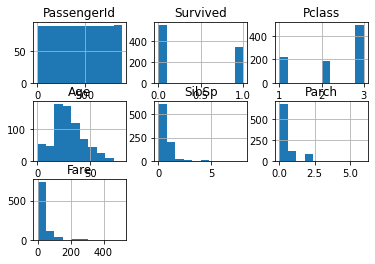

In [329]:
dfTitanicTrain.hist()

In [263]:
#missing vaules
dfTitanicTrain.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [264]:
dfTitanicTrain.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allen, Miss. Elisabeth Walton",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [265]:
dfTitanicTest.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [266]:
Pclass=dfTitanicTrain['Pclass']
my_len=len(dfTitanicTrain['Pclass'])
percentagePeople=[]
for i in range(1,4):
    percentage=len(Pclass[Pclass==i])
    percentagePeople.append(percentage)

In [267]:
percentagePeople

[216, 184, 491]

In [268]:
#count1=0
#count2=0
#count3=0
#for i in range(1,len(Pclass)+1):
#    if (Pclass[i]==1):
#        count1+=1
#    elif (Pclass[i]==2):
#        count2+=1
#    elif (Pclass[i]==3):
#       count3+=1

In [269]:
u=Pclass.unique()
u.sort()
u

array([1, 2, 3])

<BarContainer object of 3 artists>

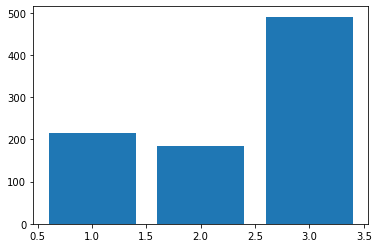

In [270]:
plt.bar(u,percentagePeople)

In [271]:
Age=dfTitanicTrain["Age"]
age=dfTitanicTrain["Age"]
age=age.dropna()
age=age.unique()
age.sort()

In [272]:
print(age)

[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.  ]


In [273]:
ageSurvivor=[]
for i in age:
    percentage=len(Age[Age==i])
    ageSurvivor.append(percentage)

<BarContainer object of 88 artists>

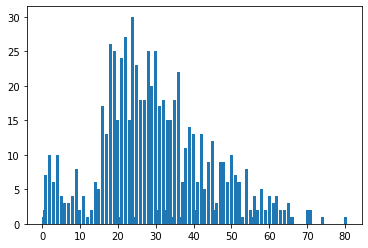

In [274]:
plt.bar(age,ageSurvivor)

# Rate of Survival 

In [275]:
dfTitanicTrain['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

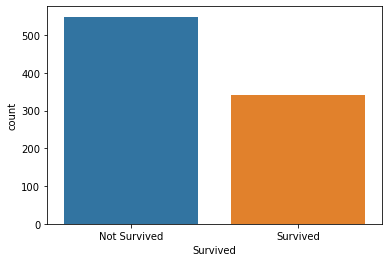

In [276]:
#plotting count of survivors
survived=dfTitanicTrain['Survived'].map({1:'Survived',0:'Not Survived'})
sns.countplot(survived)

## Based of Passenger Class

In [277]:
avgPclass=dfTitanicTrain[["Pclass","Survived"]].groupby(by="Pclass").mean().sort_values(by='Survived',ascending=False)

In [278]:
avgPclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 0, 'Average number of people survived')

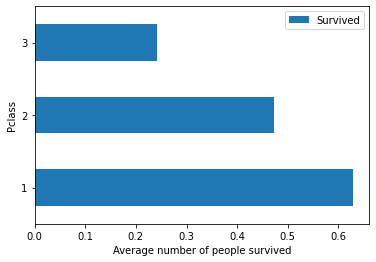

In [279]:
avgPclass.plot(kind='barh')
plt.xlabel('Average number of people survived')

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

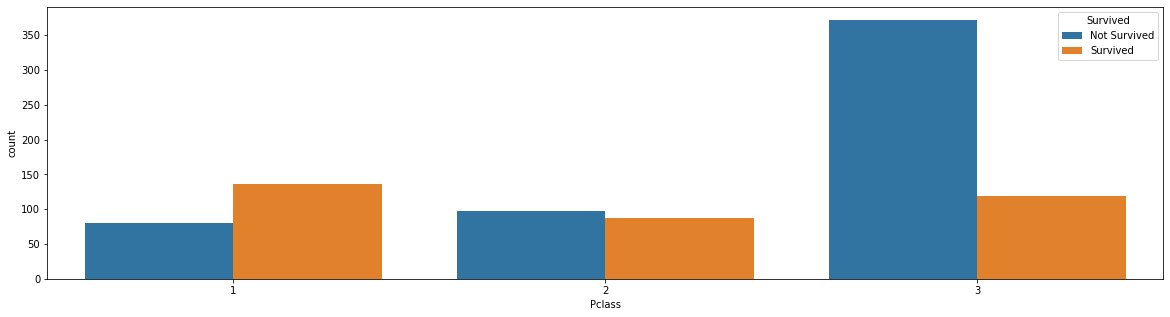

In [280]:
feature=dfTitanicTrain['Pclass']
plt.figure(figsize=(20,5))

sns.countplot(feature,hue=survived)

## Based on gender

In [281]:
genderSurvivor=dfTitanicTrain[["Sex","Survived"]].groupby(by="Sex").mean().sort_values(by='Survived',ascending=False)
genderSurvivor

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 0, 'Average number of people survived')

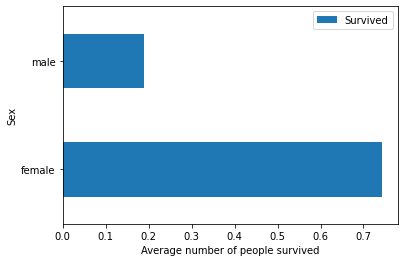

In [282]:
genderSurvivor.plot(kind='barh')
plt.xlabel('Average number of people survived')

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

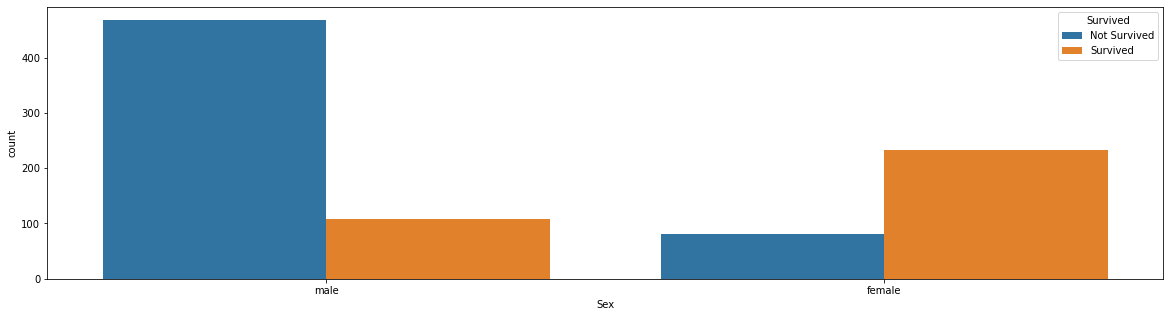

In [283]:
#plotting categorical features related to Survived target
feature=dfTitanicTrain['Sex']
plt.figure(figsize=(20,5))

sns.countplot(feature,hue=survived)

## Based on the spouse & siblings

In [284]:
sbspSurvivor=dfTitanicTrain[["SibSp","Survived"]].groupby(by="SibSp").mean().sort_values(by='Survived',ascending=True)
sbspSurvivor

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


Text(0.5, 0, 'Average number of people survived')

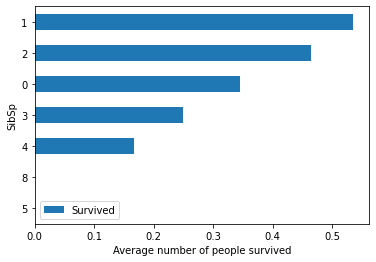

In [285]:
sbspSurvivor.plot(kind='barh')
plt.xlabel('Average number of people survived')

## Based on point of Embarking

In [286]:
embarkSurvivor=dfTitanicTrain[["Embarked","Survived"]].groupby(by="Embarked").mean().sort_values(by='Survived',ascending=False)
embarkSurvivor

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Text(0.5, 0, 'Average number of people survived')

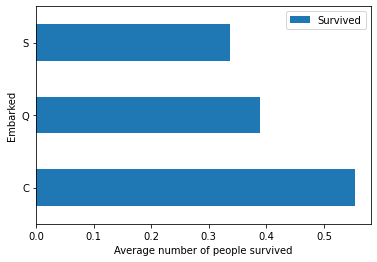

In [287]:
embarkSurvivor.plot(kind='barh')
plt.xlabel('Average number of people survived')

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

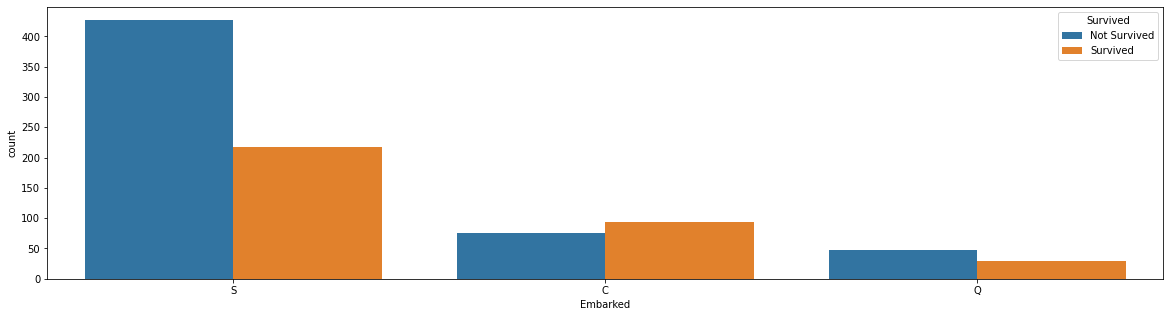

In [288]:
feature=dfTitanicTrain['Embarked']
plt.figure(figsize=(20,5))

sns.countplot(feature,hue=survived)

## Based on Age

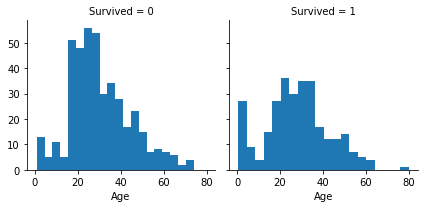

In [289]:
grid = sns.FacetGrid(dfTitanicTrain, col='Survived').map(plt.hist, 'Age', bins=20)
grid

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

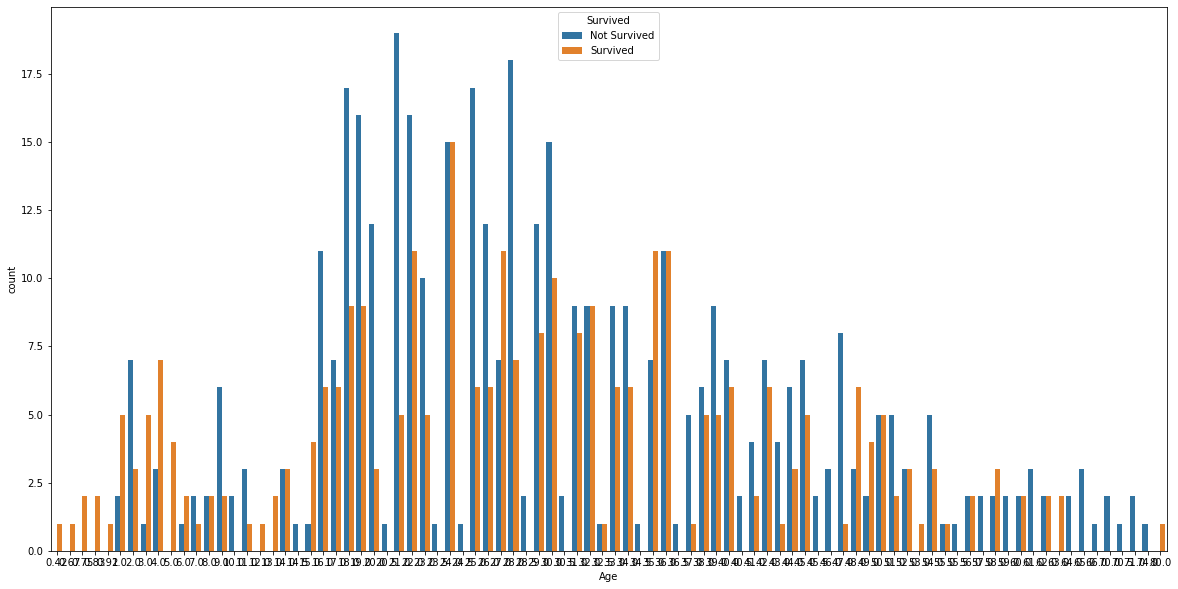

In [290]:
feature=dfTitanicTrain['Age']
plt.figure(figsize=(20,10))

sns.countplot(feature,hue=survived)

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


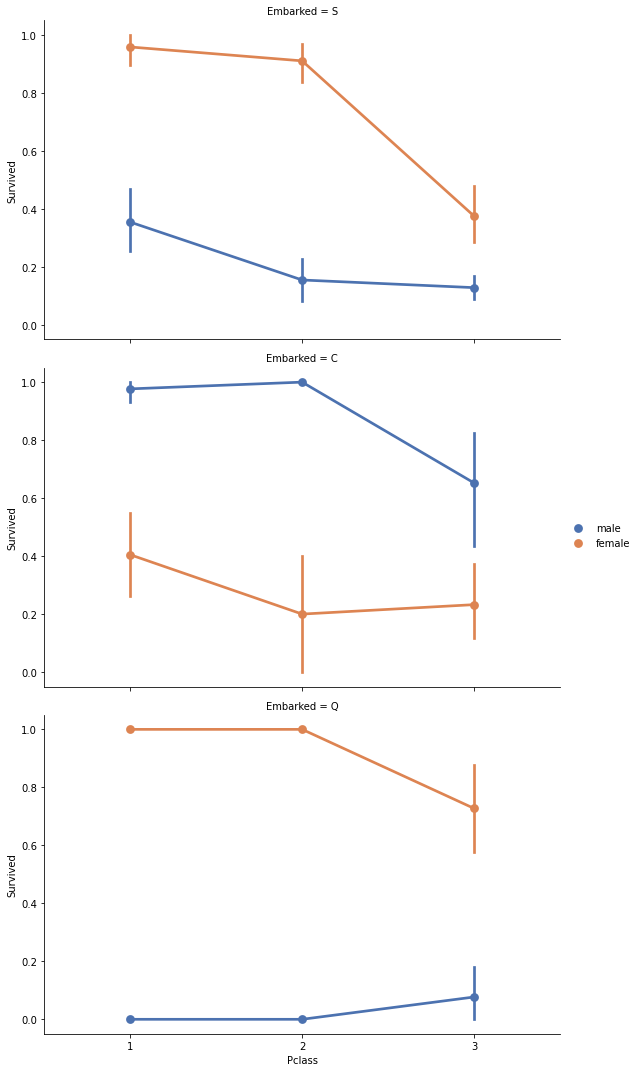

In [291]:
grid = sns.FacetGrid(dfTitanicTrain, row='Embarked', size=5, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


# Feature Engineering


In [292]:
train_df = dfTitanicTrain.drop(['Name', "Cabin","Ticket"], axis=1)
test_df = dfTitanicTest.drop(['Name',"Cabin","Ticket"], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [293]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [294]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [295]:
for df in combine:
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [296]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


In [297]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [298]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()



,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [300]:
#dfTitanicTrain.iloc(dfTitanicTrain["Embarked"]==)

In [301]:
dfTitanicTrain[dfTitanicTrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [302]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port



for df in combine:
    df['Embarked'] = df['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [309]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64

In [304]:
dfTitanicTest[dfTitanicTest['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [305]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.loc[test_df["PassengerId"]==1044]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
152,1044,3,0,60.5,0,0,14.4542,S,1,1


In [310]:
#filling missing age values
#sex male=0 female=1

for i in range(0,2):
    for j in range(1,4):
        guessedAge = train_df[(train_df['Sex'] == i) &(train_df['Pclass'] == j)]['Age'].dropna()
        guessedAge= guessedAge.median()
        
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Sex == i) & (train_df.Pclass == j),\
                    'Age'] = guessedAge
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Sex == i) & (test_df.Pclass == j),\
                    'Age'] = guessedAge


In [311]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64

In [312]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,0,1.0,1,0,7.2500,S,2,0
1,2,1,1,1,2.0,1,0,71.2833,C,2,0
2,3,1,3,1,1.0,0,0,7.9250,S,1,1
3,4,1,1,1,2.0,1,0,53.1000,S,2,0
4,5,0,3,0,2.0,0,0,8.0500,S,1,1


In [314]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,0,1.0,1,0,0,S,2,0
1,2,1,1,1,2.0,1,0,0,C,2,0
2,3,1,3,1,1.0,0,0,0,S,1,1
3,4,1,1,1,2.0,1,0,0,S,2,0
4,5,0,3,0,2.0,0,0,0,S,1,1


In [322]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,0,1.0,1,0,0,0,2,0
1,2,1,1,1,2.0,1,0,0,1,2,0
2,3,1,3,1,1.0,0,0,0,0,1,1
3,4,1,1,1,2.0,1,0,0,0,2,0
4,5,0,3,0,2.0,0,0,0,0,1,1


In [323]:
X_train = train_df.drop(["Survived","PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [324]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [325]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.25